# Task 1.1 Data Understanding
*Alberto Roberto Marinelli, Giacomo Cignoni, Alessandro Bucci*
## Importing Libraries
First we import the libraries necessary to analyze the data

In [232]:
import math
import sys
import numpy as np
import pandas as pd
import seaborn as sn
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import decomposition

In [233]:
pd.set_option('mode.use_inf_as_na', True)

def mr_bins(number_of_samples):
    return (np.log2(number_of_samples)).astype('int64') + 1


Then we load the datasets

In [234]:
df_tweets_sample = pd.read_csv('./dataset/tweets_sample.csv', sep=',', index_col=0)  # load tweets
df_users = pd.read_csv('./dataset/users.csv', sep=',', index_col=0)  # load users

In [235]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 2353593986 to 933183398
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            11507 non-null  object 
 1   lang            11508 non-null  object 
 2   bot             11508 non-null  int64  
 3   created_at      11508 non-null  object 
 4   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 539.4+ KB


In [236]:
df_tweets_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136647 entries, 528578456452612097 to 520574848935153664
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   user_id         134464 non-null  object
 1   retweet_count   132232 non-null  object
 2   reply_count     130163 non-null  object
 3   favorite_count  130128 non-null  object
 4   num_hashtags    126020 non-null  object
 5   num_urls        130145 non-null  object
 6   num_mentions    128069 non-null  object
 7   created_at      136647 non-null  object
 8   text            131286 non-null  object
dtypes: object(9)
memory usage: 10.4+ MB


In [237]:
df_tweets_sample

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
528578456452612097,567430901,0,0,0,0,0,0,2019-11-03 16:04:59,"La sera, a letto.Lui:- FarÃ² di te la donna pi..."
492852780101406721,277506943,0,0,2,1,0,0,2019-07-28 02:03:54,#RFGoNaked http://t.co/eaf1sO4TWL
888885286917605,317296274,0,dcl83oci,NaN,NaN,NaN,NaN,2020-03-21 17:43:22,Volunteers report 100% retail tobacco complian...
516101108960206848,1372026204,0,0,0,4,1,0,2019-09-30 05:44:27,What HR Lessons Did I Learn Whilst Managing Me...
528187250392461312,468101494,0,0,0,0,0,0,2019-11-02 14:10:28,"-Cara, ti voglio POSSEDERE dove non te ti ha m..."
...,...,...,...,...,...,...,...,...,...
500184073814700033,576148031,0,0,0,0,0,0,2019-08-17 07:35:50,"Porta bene Renzi! Grazie ""presidente"""
578072909085724672,25693756,0,0,0,0,0,1,2020-03-19 05:58:16,@malakhstudios You OK?
588013533557841920,2395918790,0,0,0,0,0,0,2020-04-15 16:18:45,"If there is Jacob Whiteside, there is also Jac..."


## Features informations
"Type" indicates the wanted feature Datatype for conversion in "Casting" section

### Users dataset
id, name, lang, bot, created_at and statuses_count
* **id** (*Numerical*)
  * Type: **Int64**
  * Description: Is the identifier of the single user, it will be used to join the datasets, so it is necessary that this data is a non-null integer.
* **name** (*Categorical*)
  * Type: **String**
  * Description: The name of the user.
* **lang** (*Categorical*)
  * Type: **String**
  * Description: The user’s language selected
* **bot** (*Numerical*)
  * Type: **Boolean**
  * Description: A binary variable that indicates if a user is a bot or a genuine user
* **created_at** (*Numerical*)
  * Type: **Datetime64**
  * Description: The timestamp of when the user was created
* **statuses_count** (*Numerical*)
  * Type: **Int64**
  * Description: The count of the tweets made by the user at the moment of data crawling.
### Tweets dataset
* **id** (*Numerical*)
  * Type: **Object**
  * Description: Is the identifier of the single tweet, it should be int64, but we decided to consder it object because it does not affect the data if it is not an integer.
* **user_id** (*Numerical*)
  * Type: **Int64**
  * Description: Is the identifier of the single user, it will be used to join the datasets, so it is necessary that this data is a non-null integer
* **retweet_count** (*Numerical*)
  * Type: **Int64**
  * Description: The number of retweets of the single tweet
* **reply_count** (*Numerical*)
  * Type: **Int64**
  * Description: The number of replies of the single tweet
* **favorite_count** (*Numerical*)
  * Type: **Int64**
  * Description: The number of favorites (or likes) of the single tweet
* **num_hashtags** (*Numerical*)
  * Type: **Int64**
  * Description: The number of hashtags in the single tweet
* **num_urls** (*Numerical*)
  * Type: **Int64**
  * Description: The number of urls in the single tweet
* **num_mentions** (*Numerical*)
  * Type: **Int64**
  * Description: The number of mentions in the single tweet
* **created_at** (*Numerical*)
  * Type: **Datetime64**
  * Description: The timestamp of when the single tweet was created
* **text** (*Categorical*)
  * Type: **String**
  * Description: The text of the single tweet

# Datatype Casting
## Users dataframe casting

In [238]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 2353593986 to 933183398
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            11507 non-null  object 
 1   lang            11508 non-null  object 
 2   bot             11508 non-null  int64  
 3   created_at      11508 non-null  object 
 4   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 539.4+ KB


Cast name and lang columns to string and created_at to DateTime in df_users

In [239]:
df_users.name = df_users.name.astype('string')
df_users.lang = df_users.lang.astype('string')

Showing how 'lang' is composed with a logarithmic scale bar plot

Langs in the user dataset:
en                    0.866354
it                    0.078728
es                     0.02772
pt                    0.005648
en-gb                 0.004345
ru                     0.00365
fr                    0.003128
ja                    0.002868
zh-tw                 0.001477
tr                    0.001217
id                    0.001043
ko                    0.000782
de                    0.000695
nl                    0.000521
en-GB                 0.000348
ar                    0.000261
zh-TW                 0.000261
da                    0.000174
Select Language...    0.000174
en-AU                 0.000087
zh-cn                 0.000087
pl                    0.000087
el                    0.000087
fil                   0.000087
sv                    0.000087
xx-lc                 0.000087
Name: lang, dtype: Float64


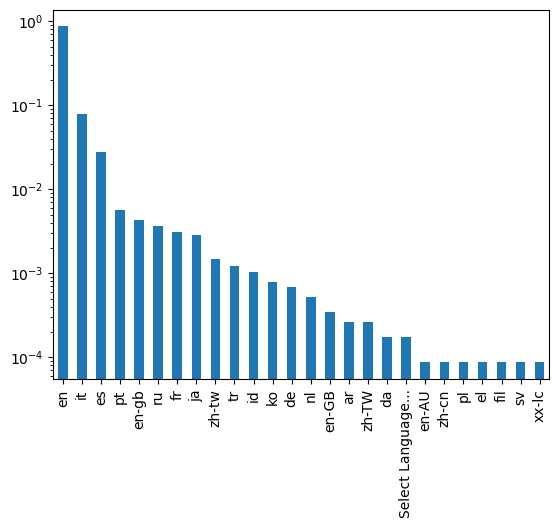

In [240]:
lang_distribution = df_users.lang.value_counts(normalize=True)
print('Langs in the user dataset:')
print(lang_distribution)

lang_distribution.plot(kind="bar")
plt.yscale('log')
plt.show()

We decided that if the lang contains a dash, we'll take into consideration only the lang before it.

E.g.: "en-gb" will become "en", "zh-tw" will become "zh".

In [241]:
import re

def lang_correction(lang_string):
    lang = lang_string
    lang = re.sub('-.*$', '', lang)

    return lang

df_users.lang = df_users.lang.apply(lang_correction)


Substituting "Select Language..." with the mode. 

In [242]:
df_users.lang.replace(to_replace="Select Language...",value=df_users.lang.mode()[0], inplace=True)

We looked at the tweets with the user id equal to the one who has 'lang' equal to xx, and determined that theier posts were english, so we changed 'lang' to 'en', which is also the mode.

In [243]:
df_users.lang.replace(to_replace="xx",value=df_users.lang.mode()[0], inplace=True)

Displaying the cleaned 'lang' in log scale:

Langs in the user dataset:
en     0.871394
it     0.078728
es     0.027720
pt     0.005648
ru     0.003650
fr     0.003128
ja     0.002868
zh     0.001825
tr     0.001217
id     0.001043
ko     0.000782
de     0.000695
nl     0.000521
ar     0.000261
da     0.000174
pl     0.000087
el     0.000087
fil    0.000087
sv     0.000087
Name: lang, dtype: float64


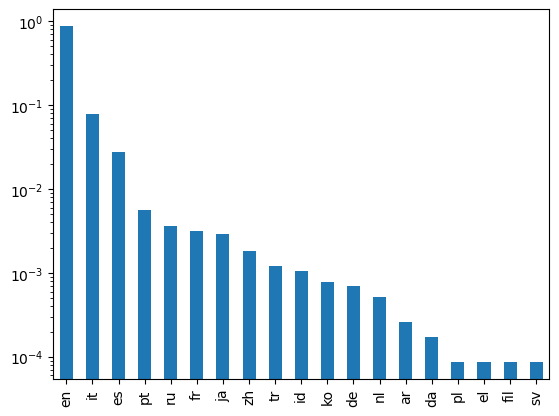

In [244]:
lang_distribution = df_users.lang.value_counts(normalize=True)
print('Langs in the user dataset:')
print(lang_distribution)

lang_distribution.plot(kind="bar")
plt.yscale('log')
plt.show()

Cast statuses_count to Int64, bot to bool and created_at to DateTime in df_users

In [245]:
df_users.statuses_count = df_users.statuses_count.astype('Int64', errors='raise')
df_users.bot = df_users.bot.astype('bool', errors='raise')
df_users.created_at = pd.to_datetime(df_users.created_at, errors='coerce')


In [246]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 2353593986 to 933183398
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            11507 non-null  string        
 1   lang            11508 non-null  object        
 2   bot             11508 non-null  bool          
 3   created_at      11508 non-null  datetime64[ns]
 4   statuses_count  11109 non-null  Int64         
dtypes: Int64(1), bool(1), datetime64[ns](1), object(1), string(1)
memory usage: 472.0+ KB


## Tweets dataframe casting

In [247]:
df_tweets_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136647 entries, 528578456452612097 to 520574848935153664
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   user_id         134464 non-null  object
 1   retweet_count   132232 non-null  object
 2   reply_count     130163 non-null  object
 3   favorite_count  130128 non-null  object
 4   num_hashtags    126020 non-null  object
 5   num_urls        130145 non-null  object
 6   num_mentions    128069 non-null  object
 7   created_at      136647 non-null  object
 8   text            131286 non-null  object
dtypes: object(9)
memory usage: 10.4+ MB


Int64 casting for numeric columns in df_tweets

In [248]:
def cast_int(x):
    try:
        return np.int64(x)
    except:
        return pd.NA
    

for col_name in df_tweets_sample.iloc[:, : 7]:
    # Cast objects to float. after this instruction the column becomes numerics
    df_tweets_sample[col_name] = pd.to_numeric(df_tweets_sample[col_name], downcast= 'float', errors='coerce')

    # Substitute values outside of Int64 limits with NaN
    df_tweets_sample[col_name] = df_tweets_sample[col_name].apply(cast_int)

    # Cast to Int64
    df_tweets_sample[col_name] = df_tweets_sample[col_name].astype('Int64', errors='raise')



Cast text column to string and created_at to DateTime in df_tweets

In [249]:
df_tweets_sample.text = df_tweets_sample.text.astype('string')
df_tweets_sample.created_at = pd.to_datetime(
    df_tweets_sample.created_at, errors='coerce') #The invalid dates are set to NaT

In [250]:
df_tweets_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136647 entries, 528578456452612097 to 520574848935153664
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         132272 non-null  Int64         
 1   retweet_count   130362 non-null  Int64         
 2   reply_count     128457 non-null  Int64         
 3   favorite_count  128519 non-null  Int64         
 4   num_hashtags    124949 non-null  Int64         
 5   num_urls        128514 non-null  Int64         
 6   num_mentions    126737 non-null  Int64         
 7   created_at      136647 non-null  datetime64[ns]
 8   text            131286 non-null  string        
dtypes: Int64(7), datetime64[ns](1), string(1)
memory usage: 11.3+ MB


# Attributes fixing

We now explore the distributions in order to find the outliers of each attribute.

## User dataset attributes fixing

We check 'created_at' whit a bar plot by year.

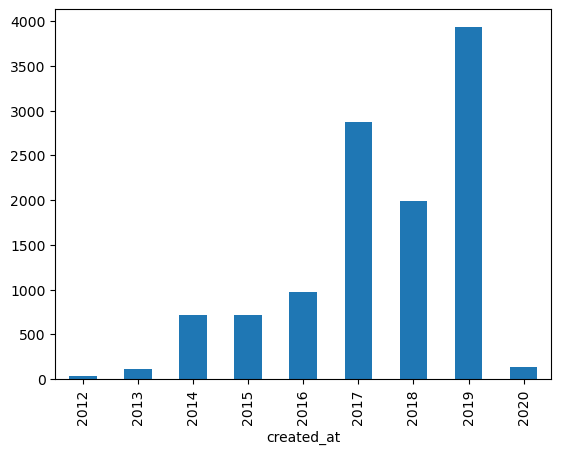

In [206]:
df_users.created_at.groupby(df_users.created_at.dt.year).count().plot(kind='bar')
plt.show()

Since Twitter was founded in 2006 and the oldest user is from 2012, there are no lower bound outliers.

Since the crawling was done in 2020, and there are no users created later than 2020, there are no upper bound outliers.

Now we check **"statuses_count"**

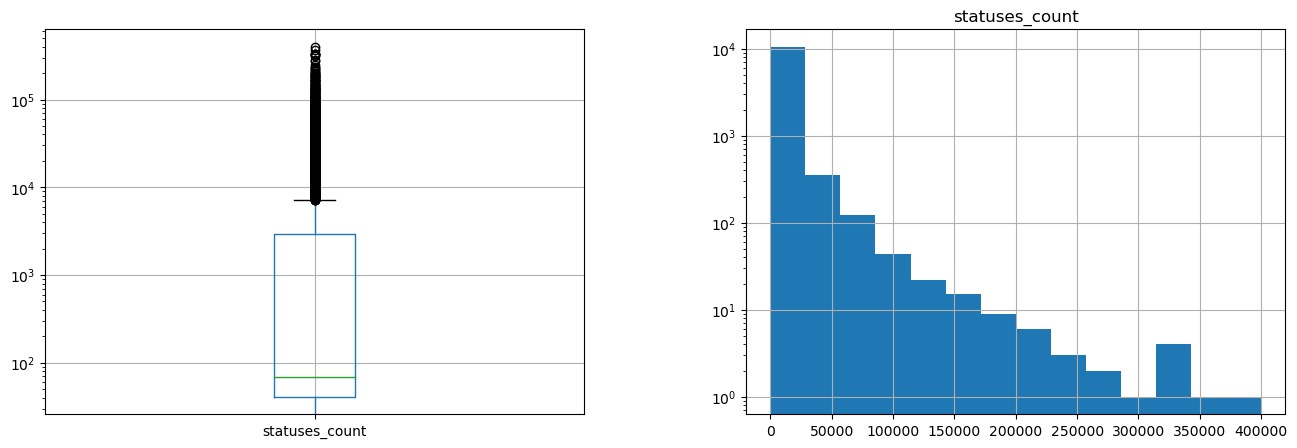

In [207]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
df_users.boxplot(column="statuses_count", ax=ax1)
ax1.set_yscale('log')
df_users.hist(column="statuses_count", ax=ax2, stacked=True, bins=mr_bins(df_users.statuses_count.count()))
ax2.set_yscale('log')
fig.subplots_adjust(wspace=0.3)
plt.show()


There are no outliers, because there is no limit on how much a user can publish in a given period of time and also there are not negative values that would be invalid.

## Tweets dataset attributes fixing

We check **"retweet_count"** attribute

The most retweet tweet ever has more than 4*10^6 retweets, so we not consider a retweet count over that threshold (we set them to NaN)

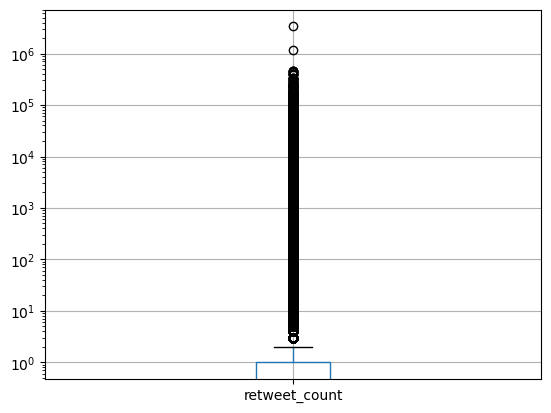

In [184]:
df_tweets_sample.boxplot(column="retweet_count")
plt.yscale('log')
plt.show()

In [185]:
max_retweets = 4*10^6
df_tweets_sample.retweet_count = df_tweets_sample.retweet_count.apply(
    # IN TUTTI QUESTI DA AGGIUNGERE CHECK X<0 E X NOT NAN
    lambda x:x if not pd.isna(x) and x < max_retweets and x >= 0 else pd.NA)

#IL LAMBDA CAMBIA IL TIPO: DA INT64 A OBJECT!!!
#PER QUESTO IL BOXPLOT NON VA
#PROBABILMENTE VA FATTA LA APPLY SPECIFICANDO axis=1 COME IN MANAGE NAN (?)

# Then we display the boxplot
df_tweets_sample.boxplot(column="retweet_count")
plt.yscale('log')
plt.show()

KeyError: "None of [Index(['retweet_count'], dtype='object')] are in the [columns]"

Now we check **'reply_count'** attribute.

The most replied tweet can't be much more replies than the highest number of replies, so we limit also the number of replies to 4*10^6

In [186]:
max_replies = 4*10^6
df_tweets_sample.reply_count = df_tweets_sample.reply_count.apply(
    lambda x: x if not pd.isna(x) and x < max_replies and x >= 0 else x)

print(df_tweets_sample.info())

# Then we display the boxplot
df_tweets_sample.boxplot(column="reply_count")
plt.yscale('log')
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 136647 entries, 528578456452612097 to 520574848935153664
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         132272 non-null  Int64         
 1   retweet_count   118696 non-null  object        
 2   reply_count     128457 non-null  object        
 3   favorite_count  128519 non-null  Int64         
 4   num_hashtags    124949 non-null  Int64         
 5   num_urls        128514 non-null  Int64         
 6   num_mentions    126737 non-null  Int64         
 7   created_at      136647 non-null  datetime64[ns]
 8   text            131286 non-null  string        
dtypes: Int64(5), datetime64[ns](1), object(2), string(1)
memory usage: 11.1+ MB
None


KeyError: "None of [Index(['reply_count'], dtype='object')] are in the [columns]"

Now we check **'favorite_count'** attribute

The most liked tweets has 7*10^6 likes, so we should limit the number of likes to that threshold

In [ ]:
max_likes = 7*10^6
df_tweets_sample.favorite_count = df_tweets_sample.favorite_count.apply(lambda x: x if x < max_likes else pd.NA)

# Then we display the boxplot
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
df_tweets_sample.boxplot(column="favorite_count", ax=ax)
fig.subplots_adjust(wspace=0.3)

**'num_hashtags'**, since the max char in a tweet is 280, we decided to replace with the median number of hashtags everything that is above that threshold

In [ ]:
max_num_hashtags = 280
df_tweets_sample.num_hashtags = df_tweets_sample.num_hashtags.apply(lambda x: x if x < max_num_hashtags else pd.NA)

# Then we display the boxplot
fig, (ax1, ax2) = plt.subplots(1, 1, figsize=(16, 5))
df_tweets_sample.boxplot(column="num_hashtags", ax=ax)
fig.subplots_adjust(wspace=0.3)

**'num_mentions'** since the max char in a tweet is 280, and since a mention to a user needs a @ before the user's nickname (which could be just a letter) we decided to replace with the median number of hashtags everything that is above 280/2.

In [ ]:
max_num_mentions = 140
df_tweets_sample.num_mentions = df_tweets_sample.num_mentions.apply(lambda x: x if x < max_num_mentions else pd.NA)

# Then we display the boxplot
fig, (ax1, ax2) = plt.subplots(1, 1, figsize=(16, 5))
df_tweets_sample.boxplot(column="num_mentions", ax=ax)
fig.subplots_adjust(wspace=0.3)

**'created_at'** since Twitter was founded in 2006 and we are in 2022, we decided to substitute the years that are outside of this range with the median for the single user, if the date is still outside of the limits, we set the date to 1972 (which is a leap year, since we don't want any February 29th problems to occur).

If the date is NaT, it remains NaT

In [ ]:
def fix_year(row):
    if row.created_at == pd.NaT:
        return pd.NaT
    else:
        tweet_creation_date = row.created_at
        min_date = np.datetime64('2006-07-15 00:00:00')
        max_date = np.datetime64('2020-12-31 23:59:59')
        
        if tweet_creation_date < min_date or tweet_creation_date > max_date:
            tweet_creation_date = row.created_at.replace(year=1972)
        
        return tweet_creation_date

df_tweets_sample.created_ = df_tweets_sample.apply(fix_year, axis=1)

# Then we display the bar plot
df_tweets_sample.created_at.groupby(df_tweets_sample.created.dt.year).count().plot(kind='bar')
plt.yscale('log')

# Preliminary cleaning

Drop tweets where user_id is NaN. Tweets that clearly cannot be associated to any user do not contain useful info for further steps.

In [251]:
df_tweets_sample.dropna(subset=['user_id'], how='any', inplace=True)

Drop name column in user Dataframe. It is not useful information to our purpuse.

In [252]:
df_users.drop(columns=['name'])

,lang,bot,created_at,statuses_count
id,,,,
2353593986,en,True,2019-02-22 18:00:42,76
2358850842,en,False,2019-02-26 03:02:32,54
137959629,en,True,2015-04-30 07:09:56,3
466124818,it,True,2017-01-18 02:49:18,50
2571493866,en,False,2019-06-18 19:30:21,7085
...,...,...,...,...
2911861962,en,False,2019-11-29 13:16:02,1126
1378532629,en,False,2018-04-27 03:01:58,3024
126984069,es,False,2015-03-29 17:01:24,6


# Manage duplicates

Before we manage the duplicates, we firsly view the heatmap of users and tweets:

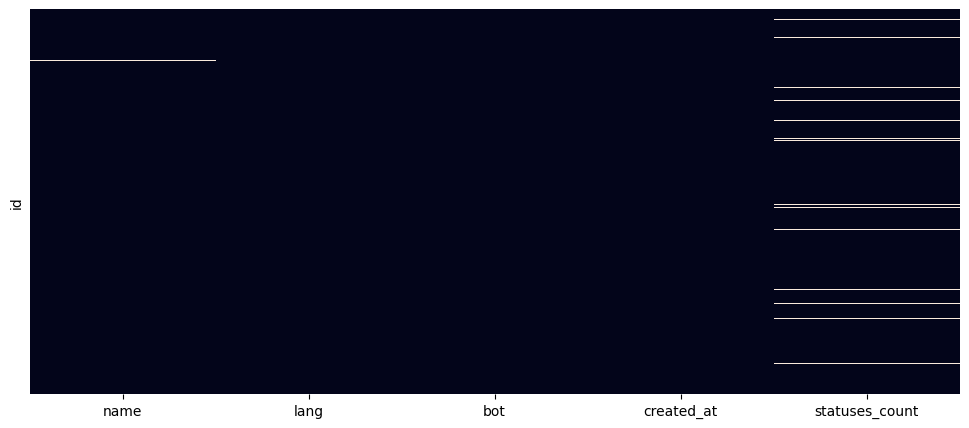

In [253]:
fig, ax = plt.subplots(figsize=(12,5)) 
sn.heatmap(df_users.isnull(), cbar=False, xticklabels=True, ax=ax, yticklabels=False)
plt.show()

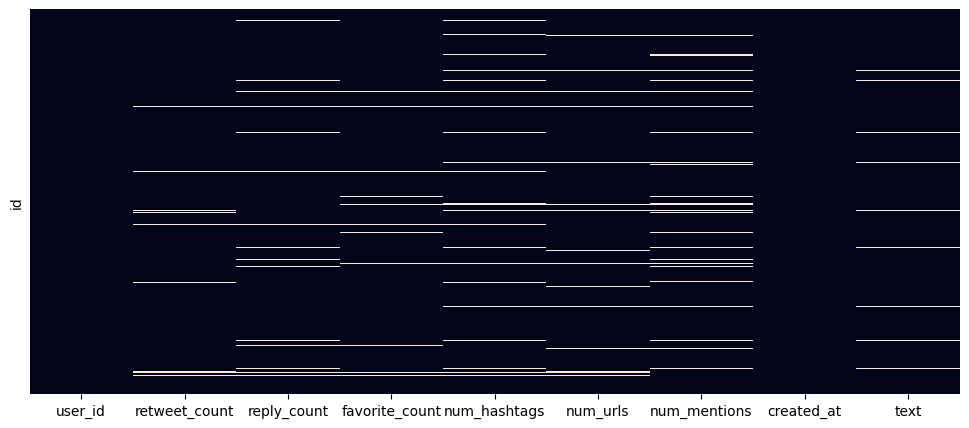

In [254]:
fig, ax = plt.subplots(figsize=(12,5)) 
sn.heatmap(df_tweets_sample.isnull(), cbar=False, xticklabels=True, ax=ax, yticklabels=False)
plt.show()

Remove and merge duplicates in users dataframe

In [262]:
df_users.reset_index(inplace=True)
df_users_duplicates = df_users

#Drop duplicati
df_users_duplicates.drop_duplicates(inplace=True)

#Ricerca duplicati sui campi id
df_users_duplicates_check = df_users_duplicates.duplicated(["id"])

#Selezione ["id"] che possiedono dei cloni (da cui effettuare recover info)
df_users_duplicates_2 = df_users_duplicates[df_users_duplicates_check]
df_users_duplicates_R = df_users_duplicates_2[["id"]]

#Right Join per selezionarli
df_users_merge = df_users_duplicates.merge(df_users_duplicates_R,on=["id"],how="right")

df_users_merge.dropna(subset=['id'], inplace=True)
df_users_merge.sort_values(["id"])

df_users.drop_duplicates(subset='id', inplace=True) #PERCHè UN DROP DUPLICATES IN FONDO SUL DATAFRAME INIZIALE?

# COSA RESTITUISCE?

,index,id,name,lang,bot,created_at,statuses_count


Remove and merge duplicates in tweets dataframe

In [263]:
df_tweets_duplicates = df_tweets_sample
#Impostare index (id tweet) come colonna del df
df_tweets_duplicates.reset_index(inplace=True)

#Drop duplicati
df_tweets_duplicates.drop_duplicates(inplace=True)

#Ricerca duplicati sui campi id (del tweet) e user_id (scrittore del tweet)
df_tweets_duplicates_check = df_tweets_duplicates.duplicated(["id", "user_id"])

#Selezione ["id", "user_id"] che possiedono dei cloni (da cui effettuare recover info)
df_tweets_duplicates_2 = df_tweets_duplicates[df_tweets_duplicates_check]
df_tweets_duplicates_R = df_tweets_duplicates_2[["id", "user_id"]]

#Right Join per selezionarli
df_tweets_merge = df_tweets_duplicates.merge(df_tweets_duplicates_R,on=["id","user_id"],how="right")

df_tweets_merge.dropna(subset=['user_id'], inplace=True)
df_tweets_merge.sort_values(["id", "user_id"])

df_tweets_sample = df_tweets_merge

# COSA RESTITUISCE?

We now see the heatmap of user and tweets without duplicates:

In [257]:
fig, ax = plt.subplots(figsize=(12,5)) 
sn.heatmap(df_users.isnull(), cbar=False, xticklabels=True, ax=ax, yticklabels=False)
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

In [258]:
fig, ax = plt.subplots(figsize=(12,5)) 
sn.heatmap(df_tweets_sample.isnull(), cbar=False, xticklabels=True, ax=ax, yticklabels=False)
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

In [259]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              0 non-null      int64         
 1   name            0 non-null      string        
 2   lang            0 non-null      object        
 3   bot             0 non-null      bool          
 4   created_at      0 non-null      datetime64[ns]
 5   statuses_count  0 non-null      Int64         
dtypes: Int64(1), bool(1), datetime64[ns](1), int64(1), object(1), string(1)
memory usage: 0.0+ bytes


In [261]:
df_tweets_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              0 non-null      object        
 1   user_id         0 non-null      Int64         
 2   retweet_count   0 non-null      Int64         
 3   reply_count     0 non-null      Int64         
 4   favorite_count  0 non-null      Int64         
 5   num_hashtags    0 non-null      Int64         
 6   num_urls        0 non-null      Int64         
 7   num_mentions    0 non-null      Int64         
 8   created_at      0 non-null      datetime64[ns]
 9   text            0 non-null      string        
dtypes: Int64(7), datetime64[ns](1), object(1), string(1)
memory usage: 0.0+ bytes


# Manage NaN pt1

Better do before join in order to work only on Users Dataframe which is significantly smaller

As statuses_count in df_users contains only tweet count and not replies, while df_tweets contains also replies, we cannot estimate NaN statuses_count with the number of the users tweets, so we fill those NaNs with median of bot and median of not-bot users

In [ ]:
def subsititute_with_median_user(row, bot_median, not_bot_median):
    if pd.isnull(row.statuses_count):
        if row['bot'] == True:
            row.statuses_count = bot_median
        else:
            row.statuses_count = not_bot_median
    return row

In [ ]:
bot_median = df_users.loc[df_users['bot'] == True].statuses_count.median().astype(np.int64)
not_bot_median = df_users.loc[df_users['bot'] == False].statuses_count.median().astype(np.int64)
print('bot median statuses_count:', bot_median)
print('not bot median statuses_count:', not_bot_median)


df_users.apply(func=subsititute_with_median_user, axis=1, args=(col_name, bot_median, not_bot_median))

68


In [ ]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 2353593986 to 933183398
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            11508 non-null  string        
 1   lang            11508 non-null  object        
 2   bot             11508 non-null  bool          
 3   created_at      11508 non-null  datetime64[ns]
 4   statuses_count  11508 non-null  Int64         
dtypes: Int64(1), bool(1), datetime64[ns](1), object(1), string(1)
memory usage: 472.0+ KB


# Joining tables
Joining the tables to make sure we work only on the user into the user DB

In [ ]:
df_joined = df_tweets_sample.join(df_users, on='user_id', how='inner', lsuffix='_tweet', rsuffix='_user')

In [ ]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 7072 to 103398
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index_tweet       5 non-null      int64         
 1   id_tweet          5 non-null      object        
 2   user_id           5 non-null      Int64         
 3   retweet_count     2 non-null      Int64         
 4   reply_count       4 non-null      Int64         
 5   favorite_count    4 non-null      Int64         
 6   num_hashtags      2 non-null      Int64         
 7   num_urls          3 non-null      Int64         
 8   num_mentions      2 non-null      Int64         
 9   created_at_tweet  5 non-null      datetime64[ns]
 10  text              3 non-null      string        
 11  index_user        5 non-null      int64         
 12  id_user           5 non-null      int64         
 13  name              5 non-null      string        
 14  lang              5 no

Function that returns the substitute attribute of a tweet. It ish the median value of the attribute of other tweets of the same user, if there are enough valid tweets, otherwise it is the median value from users which have same 'bot' attribute

# Manage NaN pt2

## Tweets Manage NaN
Fill the NaN in the numeric columns

Create Dataframe with count of valid (== non-null) numeric tweet attributes grouped by users

In [ ]:
df_grouped_by_user_num_valid = df_joined.groupby(['user_id']).count().iloc[:, 0 : 6]


Create Dataframe with median value of numeric tweet attributes grouped by users

In [ ]:
df_grouped_by_user_median = df_joined.groupby(['user_id']).median().iloc[:, 0 : 6]

Define substitue function that replace NaN features with user tweets median or with bot/not-bot median if not enough valid tweet features for that user

In [ ]:
def subsititute_with_median_tweet(row, col_name, bot_median, not_bot_median, min_valid_user_values):
    if pd.isnull(row[col_name]):
        user_feature_num_valid = df_grouped_by_user_num_valid.loc[df_grouped_by_user_num_valid.index == row.user_id][col_name]
        if user_feature_num_valid.count() > min_valid_user_values:

            user_feature_median = df_grouped_by_user_median.loc[df_grouped_by_user_median.index == row.user_id][col_name]
            # If there are at least a min number of user tweets with valid attribute
            if not pd.isna(user_feature_median):
                # Use median of attribute of same user tweets
                row[col_name] = user_feature_median.astype(np.int64)
            elif row['bot'] == True:
                row[col_name] = bot_median
            else:
                row[col_name] = not_bot_median
            # Else use median of bot/not_bot
        elif row['bot'] == True:
            row[col_name] = bot_median
        else:
            row[col_name] = not_bot_median
    return row

In [ ]:
# Minimum value of other tweets with not-NaN feature
min_valid_user_values = 4 #da calcolare eventualmente

for col_name in df_joined.iloc[:, 1 : 7]:
    # Calculate median on the feature for bots and not-bots
    bot_median = df_joined.loc[df_joined['bot'] == True][col_name].median().astype(np.int64)
    not_bot_median = df_joined.loc[df_joined['bot'] == False][col_name].median().astype(np.int64)
    print('bot median {}:'.format(col_name), bot_median)
    print('not bot median {}:'.format(col_name), not_bot_median)

    df_joined.apply(
        func=subsititute_with_median_tweet, axis=1, args=(
            col_name, bot_median, not_bot_median, min_valid_user_values))

bot median user_id: 490
not bot median user_id: 97


c:\Users\giaco\anaconda3\envs\PythonGPU\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


AttributeError: 'NAType' object has no attribute 'astype'

We now see the heatmap of user and tweets without duplicates:

In [ ]:
fig, ax = plt.subplots(figsize=(12,5)) 
sn.heatmap(df_users.isnull(), cbar=False, xticklabels=True, ax=ax, yticklabels=False)

In [ ]:
fig, ax = plt.subplots(figsize=(12,5)) 
sn.heatmap(df_tweets_sample.isnull(), cbar=False, xticklabels=True, ax=ax, yticklabels=False)